In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/journey-springfield/sample_submission.csv
/kaggle/input/journey-springfield/characters_illustration.png
/kaggle/input/journey-springfield/testset/testset/img516.jpg
/kaggle/input/journey-springfield/testset/testset/img254.jpg
/kaggle/input/journey-springfield/testset/testset/img263.jpg
/kaggle/input/journey-springfield/testset/testset/img659.jpg
/kaggle/input/journey-springfield/testset/testset/img575.jpg
/kaggle/input/journey-springfield/testset/testset/img0.jpg
/kaggle/input/journey-springfield/testset/testset/img403.jpg
/kaggle/input/journey-springfield/testset/testset/img976.jpg
/kaggle/input/journey-springfield/testset/testset/img224.jpg
/kaggle/input/journey-springfield/testset/testset/img985.jpg
/kaggle/input/journey-springfield/testset/testset/img514.jpg
/kaggle/input/journey-springfield/testset/testset/img170.jpg
/kaggle/input/journey-springfield/testset/testset/img212.jpg
/kaggle/input/journey-springfield/testset/testset/img280.jpg
/kaggle/input/journey-springfi

In [2]:
import torch
import torchvision.utils as utils
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim
import numpy as np
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [3]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [4]:
transformations = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [5]:
train_set = datasets.ImageFolder("/kaggle/input/journey-springfield/train/simpsons_dataset", transform = transformations)
test_set = datasets.ImageFolder("/kaggle/input/journey-springfield/testset", transform = transformations)

In [6]:
from pathlib import Path

TRAIN_DIR = Path('../input/journey-springfield/train/simpsons_dataset')
TEST_DIR = Path('../input/journey-springfield/testset/testset')

train_files = sorted(list(TRAIN_DIR.rglob('*.jpg')))
train_val_labels = [path.parent.name for path in train_files]
test_files = sorted(list(TEST_DIR.rglob('*.jpg')))

In [7]:
trainloader = torch.utils.data.DataLoader(train_set, 
                                          batch_size=4,
                                          shuffle=True, 
                                          num_workers=2)


testloader = torch.utils.data.DataLoader(test_set, 
                                         batch_size=4,
                                         shuffle=False, 
                                         num_workers=2)

In [8]:
# функция для показа изображения

def imshow(img):
    img = img / 2 + 0.5     # денормализуем
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [9]:
classes = pd.Series([path.parent.name for path in train_files]).unique()
classes

array(['abraham_grampa_simpson', 'agnes_skinner',
       'apu_nahasapeemapetilon', 'barney_gumble', 'bart_simpson',
       'carl_carlson', 'charles_montgomery_burns', 'chief_wiggum',
       'cletus_spuckler', 'comic_book_guy', 'disco_stu', 'edna_krabappel',
       'fat_tony', 'gil', 'groundskeeper_willie', 'homer_simpson',
       'kent_brockman', 'krusty_the_clown', 'lenny_leonard',
       'lionel_hutz', 'lisa_simpson', 'maggie_simpson', 'marge_simpson',
       'martin_prince', 'mayor_quimby', 'milhouse_van_houten',
       'miss_hoover', 'moe_szyslak', 'ned_flanders', 'nelson_muntz',
       'otto_mann', 'patty_bouvier', 'principal_skinner',
       'professor_john_frink', 'rainier_wolfcastle', 'ralph_wiggum',
       'selma_bouvier', 'sideshow_bob', 'sideshow_mel', 'snake_jailbird',
       'troy_mcclure', 'waylon_smithers'], dtype=object)

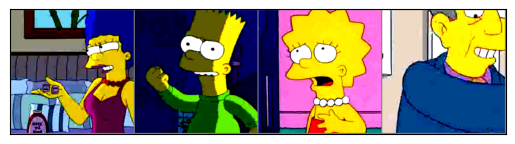

marge_simpson bart_simpson lisa_simpson principal_skinner


In [10]:
# получаем несколько случайных тренировочных изображений
dataiter = iter(trainloader)
images, labels = next(dataiter)

# показываем изображения
plt.grid(False)
plt.xticks([])
plt.yticks([])
imshow(utils.make_grid(images))
# печатаем метки

print(' '.join('%5s' % classes[labels[j]] for j in range(4)))


In [11]:
import torch.nn as nn
import torch.nn.functional as F

In [12]:
class Net(nn.Module):

    def __init__(self, n_classes):
        super().__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=8, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv4 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv5 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=96, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.out = nn.Linear(96 * 5 * 5, n_classes)


    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.conv5(x)

        x = x.view(x.size(0), -1)
        logits = self.out(x)
        return logits
net = Net(len(classes))

In [13]:
criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [14]:
# -*- coding: utf-8 -*-

# проходим в цикле по набору данных несколько раз
for epoch in range(2):  

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # получаем вводные данные
        inputs, labels = data

        # обнуляем параметр gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # печатаем статистику
        running_loss += loss.item()
        if i % 2000 == 1999:    # печатаем каждые 2000 мини-пакетов
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Тренировка завершена')

[1,  2000] loss: 2.921
[1,  4000] loss: 2.268
[2,  2000] loss: 1.581
[2,  4000] loss: 1.387
Тренировка завершена


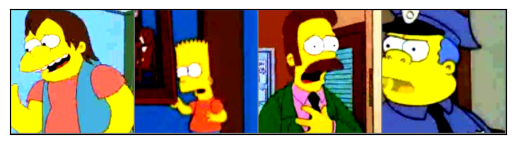

Predicted:  nelson_muntz | bart_simpson | ned_flanders | chief_wiggum


In [15]:
dataiter = iter(testloader)
images, labels = next(dataiter)
outputs = net(images)

# печатаем изображения
plt.grid(False)
plt.xticks([])
plt.yticks([])
imshow(utils.make_grid(images))

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' | '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

In [16]:
def predict(net, testloader):
    with torch.no_grad():
        logits = []
        dataiter = iter(testloader)
          
        for inputs in testloader:
            images, labels = next(dataiter)
            net.eval()
            outputs = net(images)
            logits.append(outputs)

    probs = nn.functional.softmax(torch.cat(logits), dim=-1).numpy()
    return probs

In [17]:
probs = predict(net, testloader)

preds = [classes[i] for i in probs.argmax(axis=-1)]

In [18]:
test_filenames = [f'img{i}' for i in range(len(preds))]

In [19]:
pd.DataFrame({
    "Id": test_filenames,
    "Expected": preds
}).to_csv("submission.csv", index=False)